# Machine Learning - Practical 1 - Linear Regression

Names: {Santosh Luitel,Ayush Poudel}  
Summer Term 2024   

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.

## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [ ]:
data = pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [ ]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed. This makes the train and test splits same even if you re-run the notebook. Keeping the splits same is important for the fair models comparison.

In [ ]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [ ]:
# set random seed to make sure every test set is the same
np.random.seed(seed=12)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)


Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatter plots** relating the target variable to one of the feature values. For this you will need 81 scatter plots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

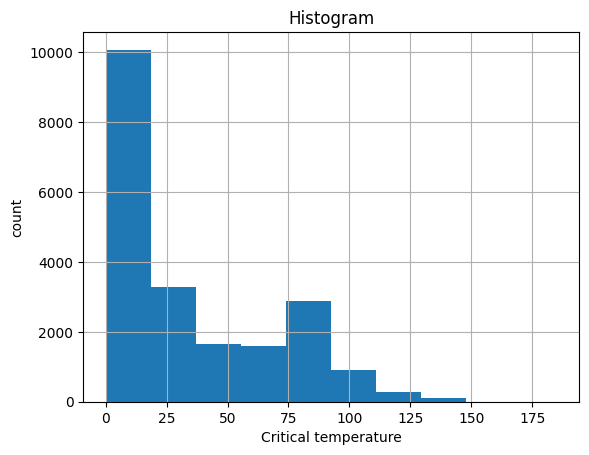

In [ ]:

# Histogram of the target variable
plt.hist(y_train_full)
plt.xlabel('Critical temperature')
plt.ylabel('count')
plt.title('Histogram')
plt.grid('true')

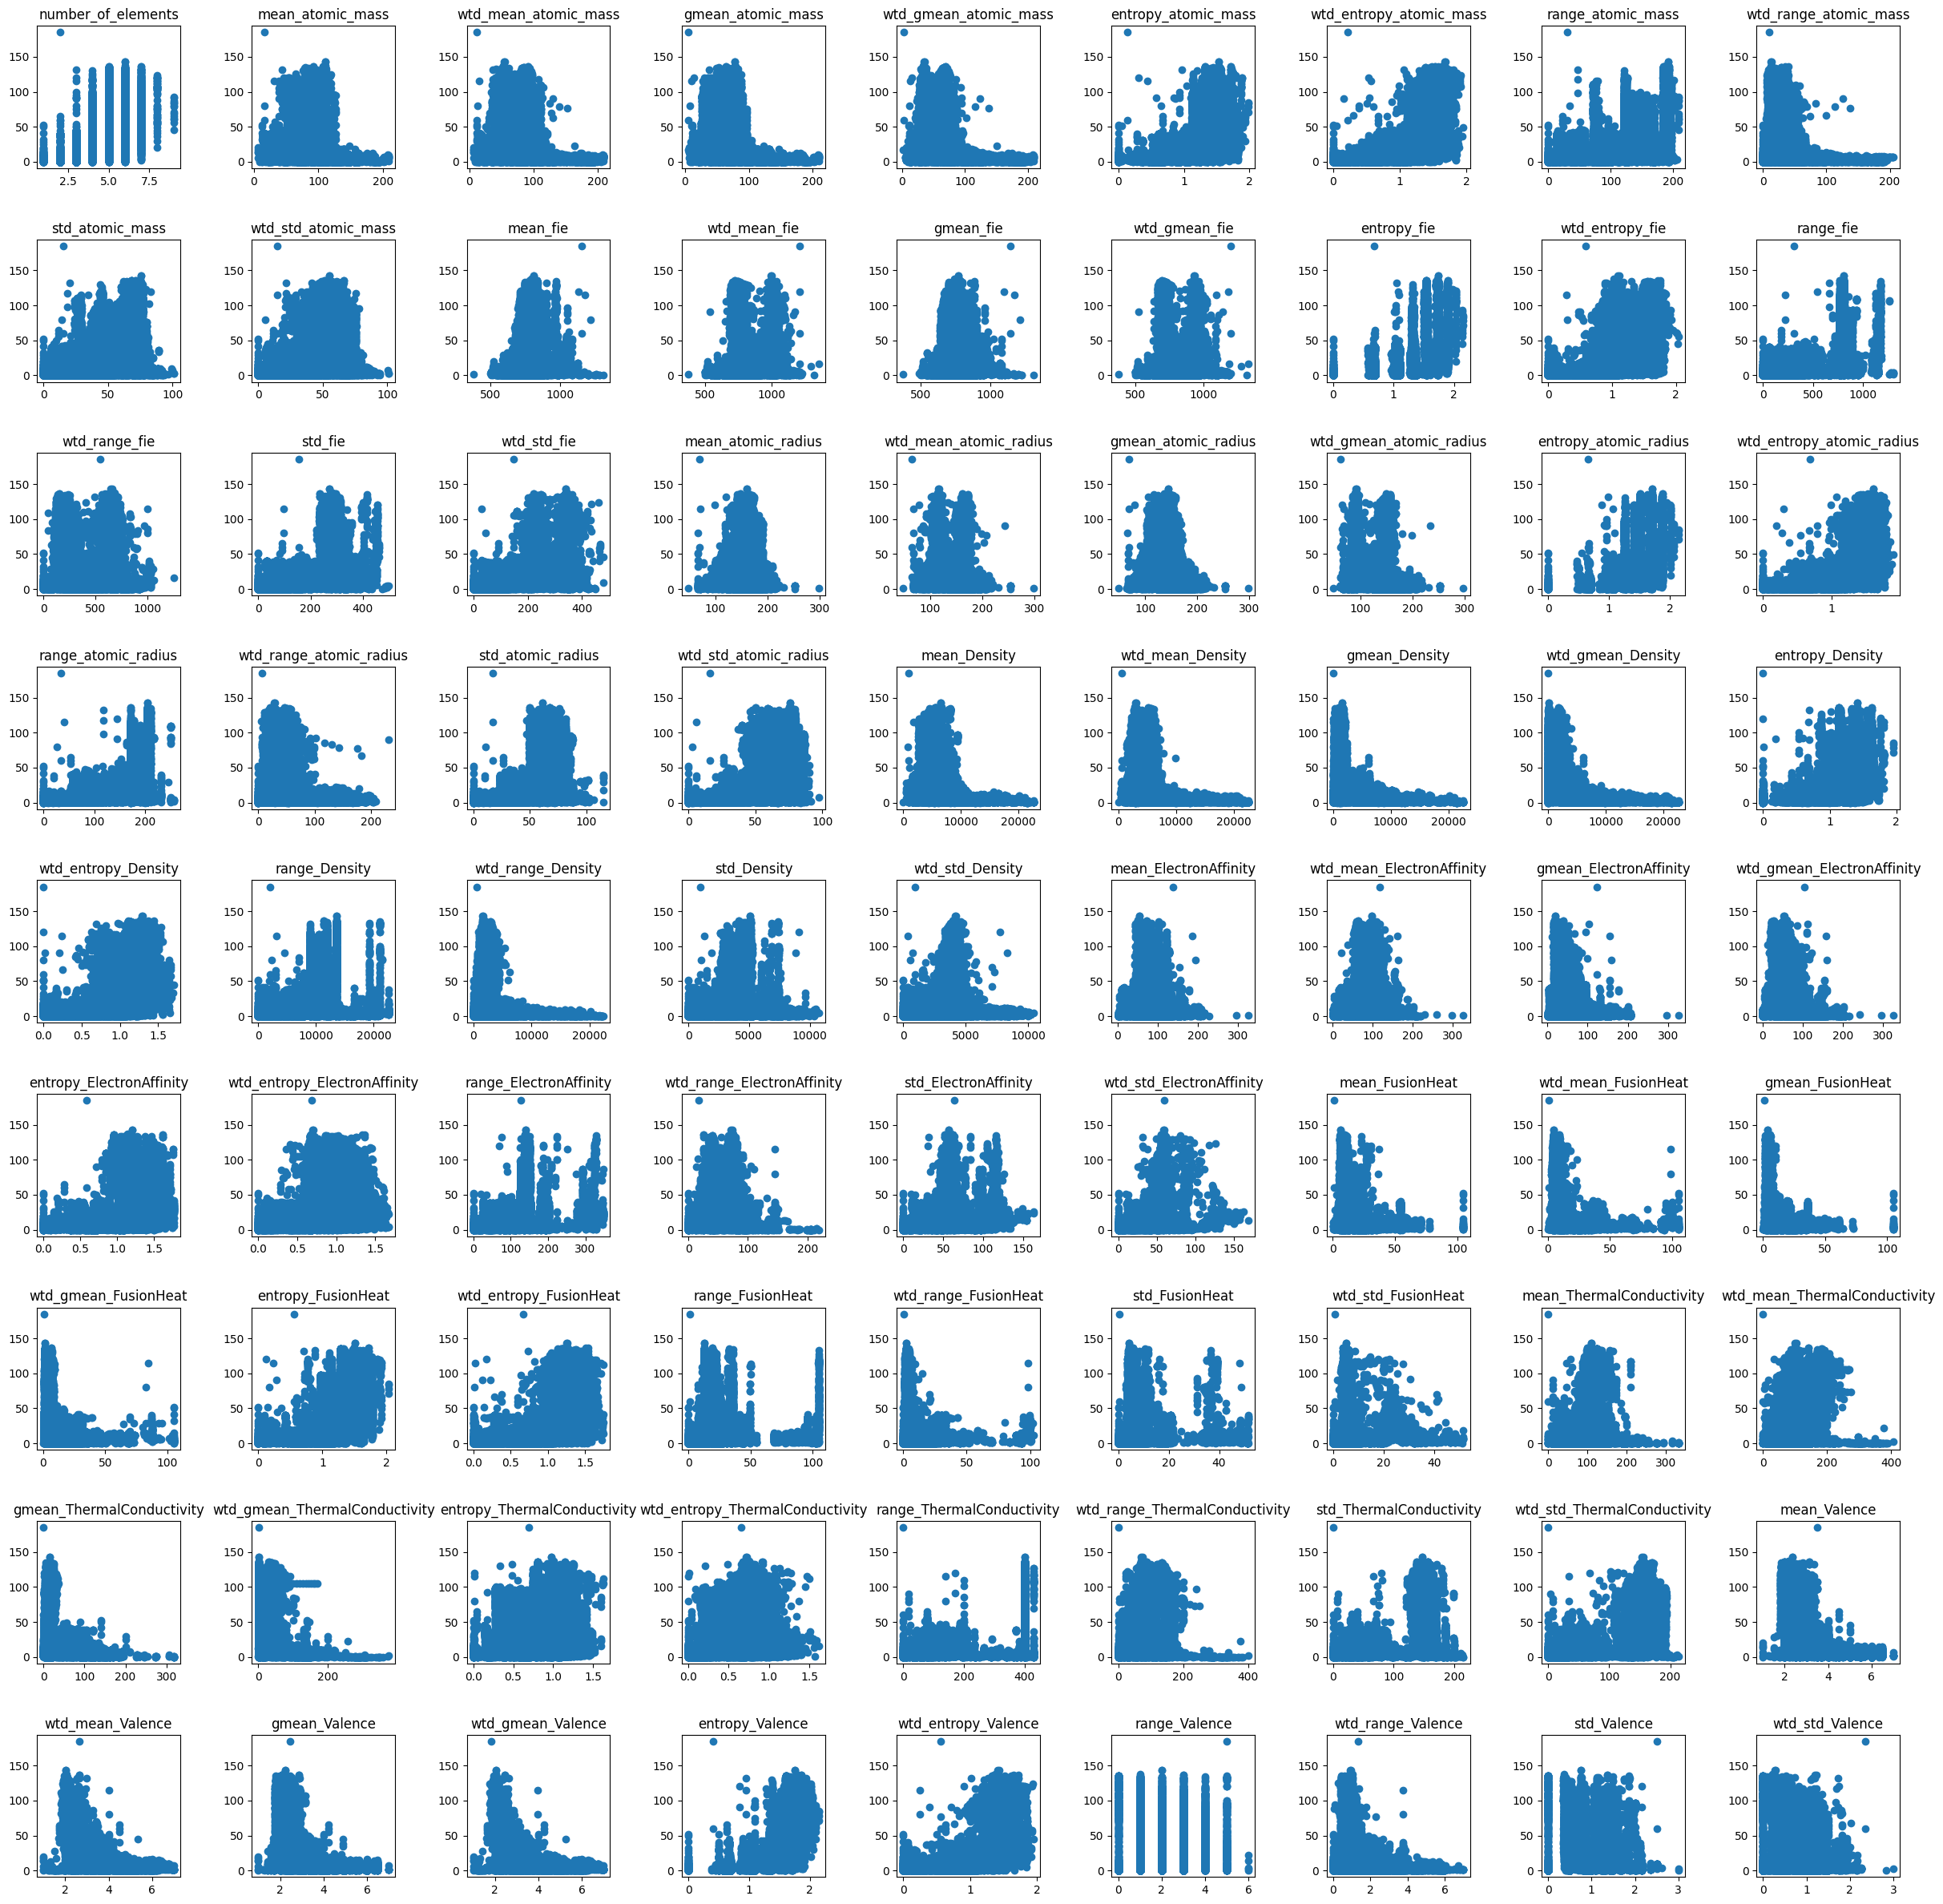

In [ ]:
# Scatter plots of the target variable vs. features
fig,axs= plt.subplots(9,9,figsize=(30,30))
x=0
for i in range(9):
    for j in range(9):
        axs[i,j].scatter(X_train_full[:,x],y_train_full)
        axs[i,j].set_title(data.columns[x])

        x+=1
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()       

In [ ]:
# Normalize
def normalized(data):
    return StandardScaler().fit_transform(data)   
for i in range(5):
    a = np.mean(X_train_full[:,i])
    b = np.median(X_train_full[:, i])  # Added a closing parenthesis here
    no_a = np.mean(normalized(X_train_full)[:, i]) 
    no_b = np.median(normalized(X_train_full)[:, i]) 
    print(f"Feature {i+1} Before: Mean: {a}, Median: {b}")
    print(f"Feature {i+1} After: Mean: {no_a}, Median: {no_b}")
   

Feature 1 Before: Mean: 4.117613061696287, Median: 4.0
Feature 1 After: Mean: -5.475453341117181e-17, Median: -0.08172070394769494
Feature 2 Before: Mean: 87.53730615761624, Median: 84.956174
Feature 2 After: Mean: -2.813014153998952e-16, Median: -0.08727100983206768
Feature 3 Before: Mean: 72.94492542368116, Median: 60.6916808333333
Feature 3 After: Mean: -3.8191287054292336e-16, Median: -0.3670229080946442
Feature 4 Before: Mean: 71.23621915368504, Median: 66.3615924315719
Feature 4 After: Mean: -2.4947534285465156e-16, Median: -0.15769085307658795
Feature 5 Before: Mean: 58.46140148170142, Median: 39.8912226497587
Feature 5 After: Mean: -1.9335194610820045e-17, Median: -0.5084140471803789


Which material properties may be useful for predicting superconductivity? What other observations can you make?


 Answer:
By observing the graph, the properties like wtd_std_fusionHeat, wtd_mean_density appears to be more sensitive to the critical temperature. Range_valene and Number_of_elements seems to have no correlation at all.

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [ ]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  22551.71197744781
r^2:  -20.265945004404795


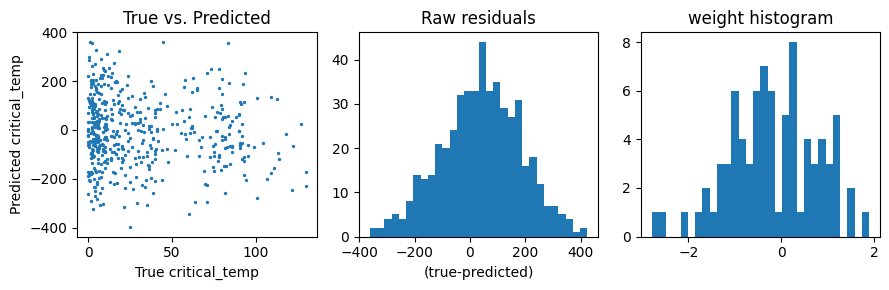

In [ ]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_testing = np.random.randn(y_test.size) * np.max(y_test)

plot_regression_results(y_test, y_pred_testing, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regression result, you should get mean squared error of 707.8.

In [ ]:
def ols_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    X_train_b=np.c_[np.ones((X_train.shape[0],1)),X_train]
    X_test_b=np.c_[np.ones((X_test.shape[0],1)),X_test]
    weights=np.linalg.inv(X_train_b.T.dot (X_train_b)).dot(X_train_b.T).dot(y_train)
     
    y_pred=X_test_b.dot(weights)


    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  531.6515250948246
r^2:  0.49866014139056103


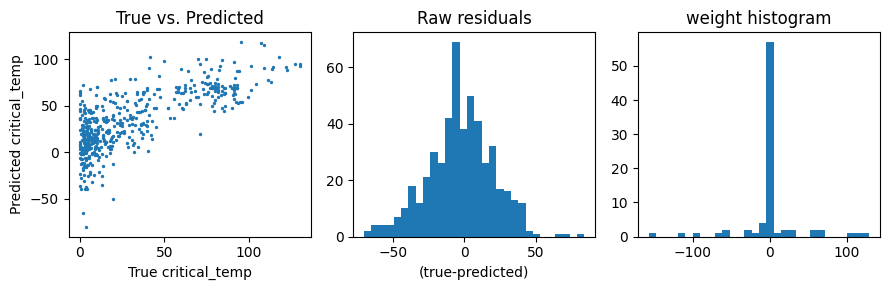

In [ ]:
# Plots of the results

a,b= ols_regression(X_test, X_train, y_train)
plot_regression_results(y_test,b,a)

What do you observe? Is the linear regression model good?

This linear regression model has  high MSE value and comparetively low R Square value. This could be considered good enough.

## Task 3: Compare your implementation to sklearn

Now, familiarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [ ]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
  

    model=   linear_model.LinearRegression().fit(X_train, y_train)
    weights = np.hstack([model.intercept_.reshape(-1,1), model.coef_])
    y_pred = model.predict(X_test)


    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  531.6515250655998
r^2:  0.49866014141811954


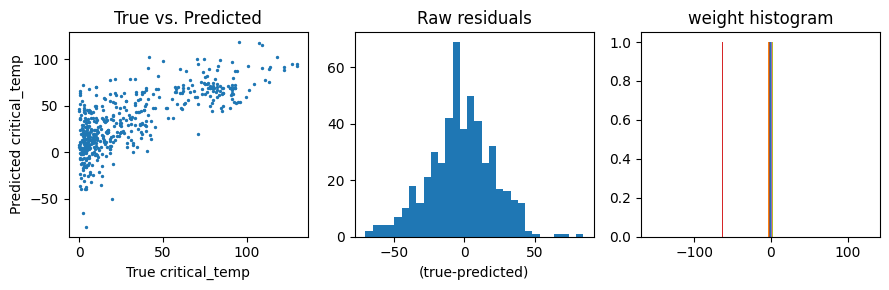

In [ ]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  278.21006961520914
r^2:  0.7376518445240348


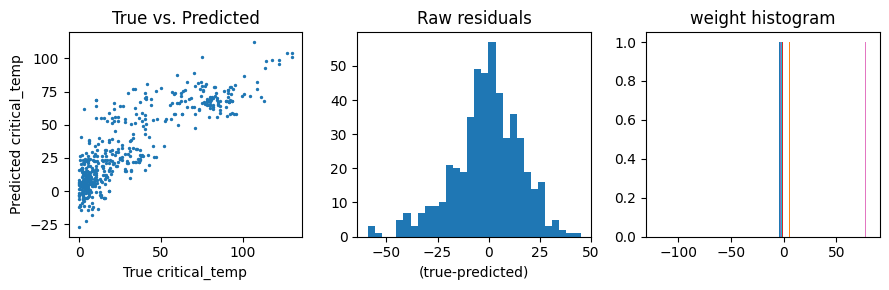

In [ ]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

This performs much better than with the smaller dataset. MSE has decreased signifantly and R square has increased as well. All of the weights are near to zero.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [ ]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    X_test= np.c_[np.ones((X_test.shape[0],1)),X_test]
    X_train=np.c_[np.ones((X_train.shape[0],1)),X_train]
    weights=np.linalg.inv(X_train.T.dot(X_train) +(alpha*np.identity(X_train.shape[1]))).dot(X_train.T).dot(y_train)
    
    y_pred=X_test.dot(weights)

    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  431.28235195753695
r^2:  0.5933068501730088


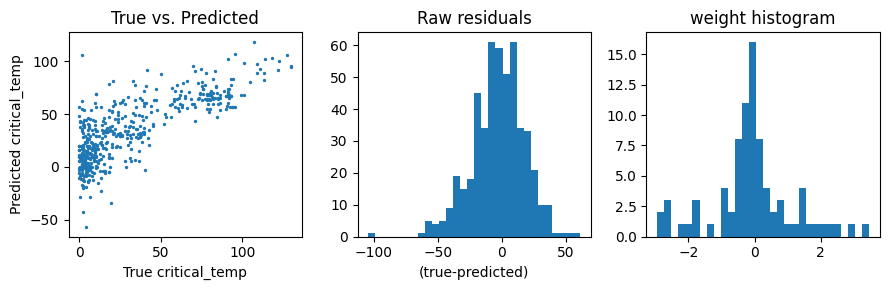

In [ ]:
# Run ridge regression with alpha=10

weights,y_pred=ridge_regression(X_test, X_train, y_train, 10)
# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha\text{s}$ (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [ ]:
alphas = np.logspace(-7, 7, 20)

# ---------------- INSERT CODE ----------------------
al,we,ms=[],[],[]
for a in alphas:

    weights,y_pred=ridge_regression(X_test, X_train, y_train, a)
    mse=mean_squared_error(y_test,y_pred)
    al.append(a)
    we.append(weights)
    ms.append(mse)

we=np.array(we)
we=np.squeeze(we).T
# ---------------- END CODE -------------------------

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

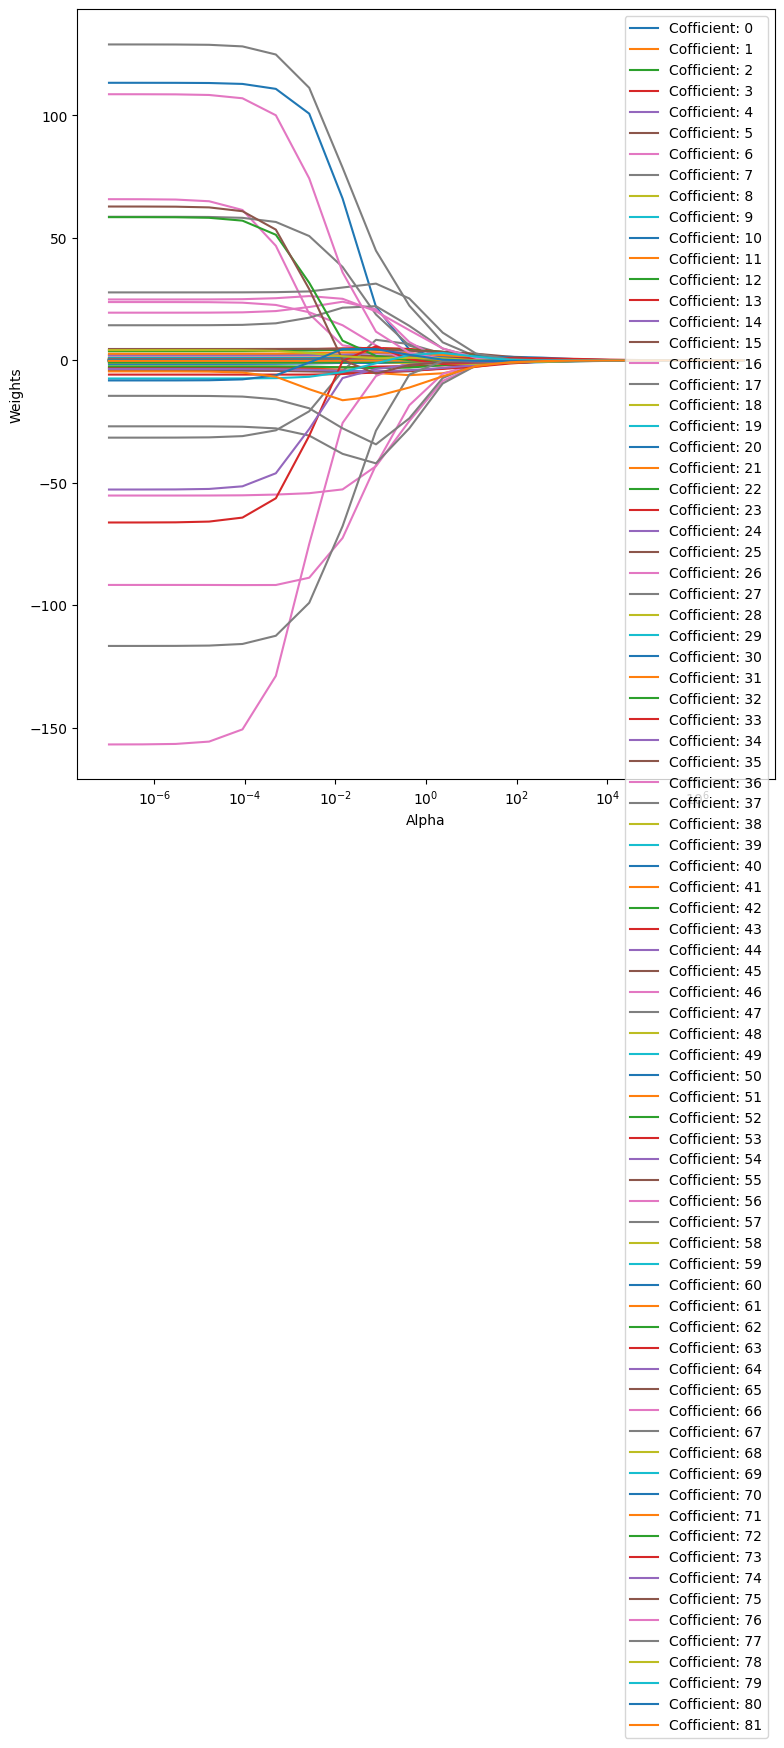

In [ ]:

# Plot of coefficients vs. alphas
plt.figure(figsize=(9,10))
for i in range(82):
    plt.plot(al,we[i,:],label=f'Cofficient: {i}')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Weights')
plt.legend()
     

Why are the values of the weights largest on the left? Do they all change monotonically? 

with alpa being lowest in the left, the weight are relatively less penalized and behaves like OlS and it therefore it is largest onn the left. when alpha grows, weights are penalized more and it shrinks to 0.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 708.

Text(2069.13808111479, 384.444318624681, 'Minimum: (384.444318624681, 2069.13808111479)')

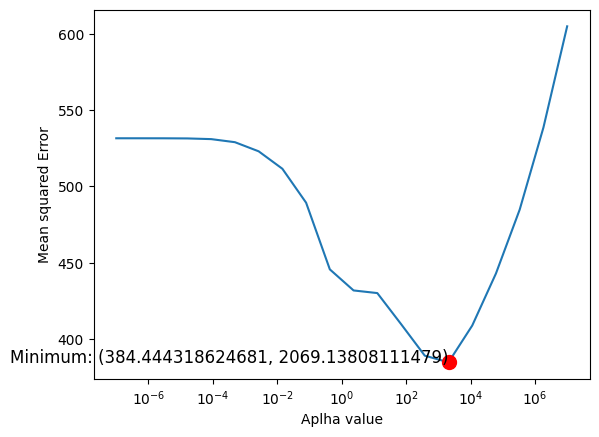

In [ ]:
# Plot of MSE  vs. alphas
min_ms=min(ms)
min_index=ms.index(min_ms)
min_al=al[min_index]
plt.plot(al,ms)
plt.xscale('log')
plt.xlabel('Aplha value')
plt.ylabel('Mean squared Error')
# Plot a marker at the minimum y-coordinate
plt.plot(min_al, min_ms, marker='o', markersize=10, color='red')

# Annotate the minimum point
plt.text(min_al, min_ms, f'Minimum: ({min_ms}, {min_al})', fontsize=12, ha='right')

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

Alpha=406.928 gives the Minimum MSE  of 379.27. yes, it is better than the unregularized model. The curve should reach arond 600 on the left because when the value of alpha is really low, it behaves like OLS regression and our MSE value for OLS regression is ~600.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [ ]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------

    model= linear_model.Ridge(alpha=alpha).fit(X_train,y_train)
    y_pred= model.predict(X_test)
    weights=model.coef_


    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

Text(0, 0.5, 'Mean squared Error')

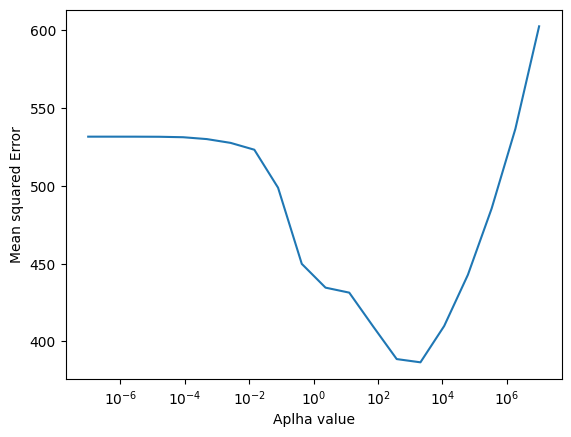

In [ ]:
# Plot of MSE  vs. alphas
err=[]
for a in alphas:   
    weights,y_pred=ridge_regression_sklearn(X_test,X_train,y_train,a)
    mse=mean_squared_error(y_test,y_pred)
    err.append(mse)
plt.plot(alphas,err)
plt.xscale('log')
plt.xlabel('Aplha value')
plt.ylabel('Mean squared Error')

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [ ]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------

    for i,a in enumerate(alphas):
        mse=cross_val_score(linear_model.Ridge(a),X,y,cv=n_folds,scoring='neg_mean_squared_error')
        cv_results_mse[:,i]=mse

     
    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)


We plot the MSE trace for each fold separately:

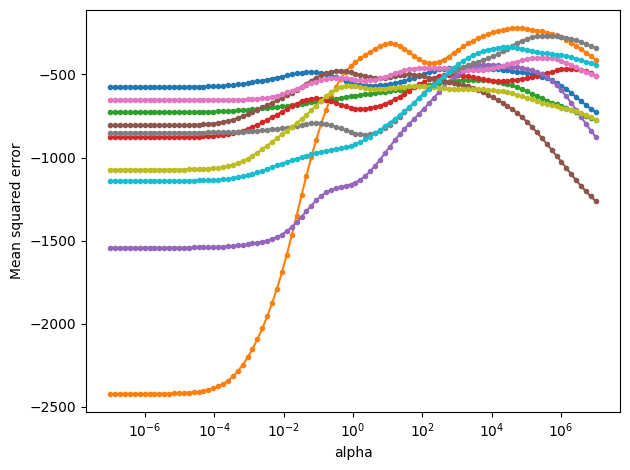

In [ ]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

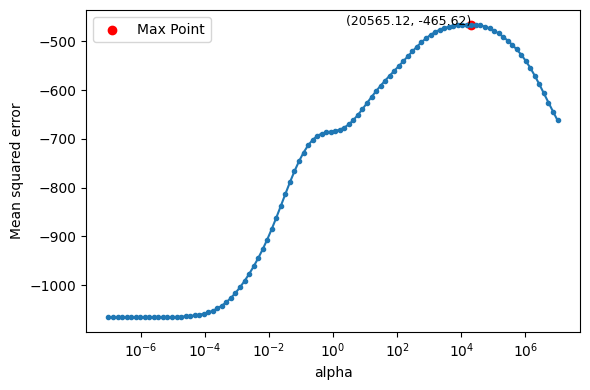

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

# Find the index of the maximum value
max_index = np.argmax(np.mean(mse_cv, axis=0))
max_x = alphas[max_index]
max_y = np.mean(mse_cv, axis=0)[max_index]

# Plot a marker at the maximum point
plt.scatter(max_x, max_y, color='red', label='Max Point')
plt.legend()

# Annotate the maximum point with its x and y values
plt.text(max_x, max_y, f'({max_x:.2f}, {max_y:.2f})', fontsize=9, ha='right')

plt.show()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

The optimal value of alpha is 215.44 and it is lower to that of test set. They differ with a slight margin.(355,379)

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

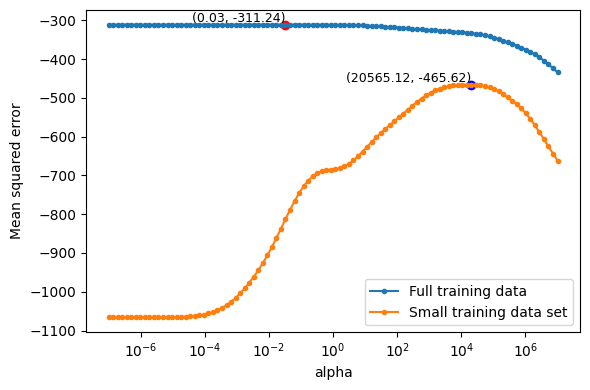

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-', label='Full training data')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-', label='Small training data set')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

# Find the indices of the maximum values
max_index_full = np.argmax(np.mean(mse_cv_full, axis=0))
max_index_small = np.argmax(np.mean(mse_cv, axis=0))

plt.scatter(alphas[max_index_full], np.mean(mse_cv_full, axis=0)[max_index_full], color='red')
plt.scatter(alphas[max_index_small], np.mean(mse_cv, axis=0)[max_index_small], color='blue')
plt.legend()

plt.text(alphas[max_index_full], np.mean(mse_cv_full, axis=0)[max_index_full], f'({alphas[max_index_full]:.2f}, {np.mean(mse_cv_full, axis=0)[max_index_full]:.2f})', fontsize=9, ha='right', va='bottom')
plt.text(alphas[max_index_small], np.mean(mse_cv, axis=0)[max_index_small], f'({alphas[max_index_small]:.2f}, {np.mean(mse_cv, axis=0)[max_index_small]:.2f})', fontsize=9, ha='right', va='bottom')

plt.show()

We zoom in on the blue curve to the very left:

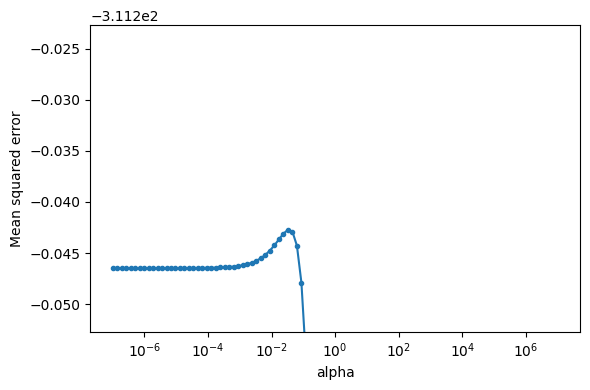

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.max(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

The CV curve on the full data set looks so different maybe because  the subset of data might not fully represent the variability present in the full dataset.  The optimal value ofpha is 0.02.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2228f565-5a6f-4f81-aa1d-6a3a4939ded7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>